## 다항 변수에 대한 regression. 다항 회귀 분석

In [0]:
def prn_shape(*args):
  print(' '.join([str(arg.shape) for arg in args]))

In [0]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [0]:
X = iris.data
Y = iris.target
#Y = Y.reshape((-1, 1))

In [4]:
NUM = 100
Xtr = X[:NUM]
Ytr = Y[:NUM]
Xte = X[NUM:]
Yte = Y[NUM:]
print(Xtr.shape)
print(Xte.shape)

(100, 4)
(50, 4)


In [0]:
def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))

In [0]:

# 주어진 모델로 실행하고, 결과 성능 출력하기
from sklearn.metrics import mean_squared_error, r2_score

def exe_regression(model, Xtr, Ytr, Xte, Yte):
  prn_shape(Xtr, Ytr, Xte, Yte)
  model.fit(Xtr, Ytr)
  Y2 = model.predict(Xte)
  #print('Y2.shape', Y2.shape)
  rmse_v = rmse(Yte, Y2)
  print("RMSE: %.4f" % (rmse_v))
  print("MSE: %.4f" % mean_squared_error(Yte, Y2))
  print('R2: %.4f' % r2_score(Yte, Y2))

In [0]:
# https://xavierbourretsicotte.github.io/lasso_implementation.html

def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

In [0]:
### 내 regression 클래스 만들기
import matplotlib.pyplot as plt

class MyRegressWithLasso(object):    
  def fit(self, X, Y):
    rows = X.shape[0] # X.shape[0] - 행의 갯수
    X = X.reshape((rows, -1)) # 1차원벡터인 경우, 행열로 변환
    Y = Y.reshape((rows, -1)) # 1차원벡터인 경우, 행열로 변환
    
    # Initialize variables
    self.m, self.n = X.shape
    self.initial_theta = np.ones((self.n,1))
    self.theta_list = list()
    self.lamda = np.logspace(0,4,300)/10 #Range of lambda values

    #Run lasso regression for each lambda
    for l in self.lamda:
        theta = coordinate_descent_lasso(self.initial_theta, X, Y, lamda = l, num_iters=100)
        self.theta_list.append(theta)
    #Stack into numpy array
    self.theta_lasso = np.stack(self.theta_list).T

  def plot(self):  
    #Plot results
    n,_ = self.theta_lasso.shape
    plt.figure(figsize = (12,8))

    for i in range(n):
        plt.plot(self.lamda, self.theta_lasso[i])

    plt.xscale('log')
    plt.xlabel('Log($\\lambda$)')
    plt.ylabel('Coefficients')
    plt.title('Lasso Paths - Numpy implementation')
    plt.legend()
    plt.axis('tight')    
    plt.show()
      
  def predict(self, X):
    rows = X.shape[0] # X.shape[0] - 행의 갯수
    #Xb = np.append(X, np.ones((rows, 1)), axis=1)
    pred = np.matmul(X, self.w)
    return pred

=== My Regression


No handles with labels found to put in legend.


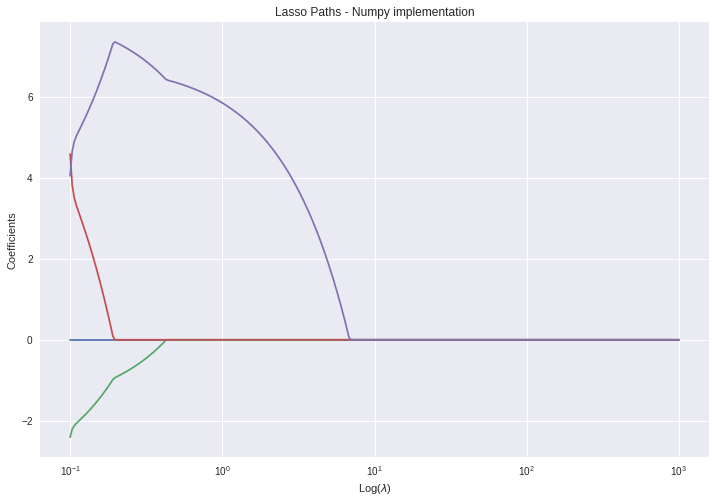

In [9]:
from sklearn.linear_model import LinearRegression

mymodel = MyRegressWithLasso()
#skmodel = LinearRegression()

print('=== My Regression')
mymodel.fit(Xtr, Ytr)
mymodel.plot()

#exe_regression(mymodel, Xtr, Ytr, Xte, Yte)


#print('=== scikit-learn Regression')
#exe_regression(skmodel, Xtr, Ytr, Xte, Yte)
#print('W', skmodel.coef_, skmodel.intercept_)

  

(0.00019413479728713241,
 10.45289003953025,
 -0.15359167908331273,
 0.6251612080468257)

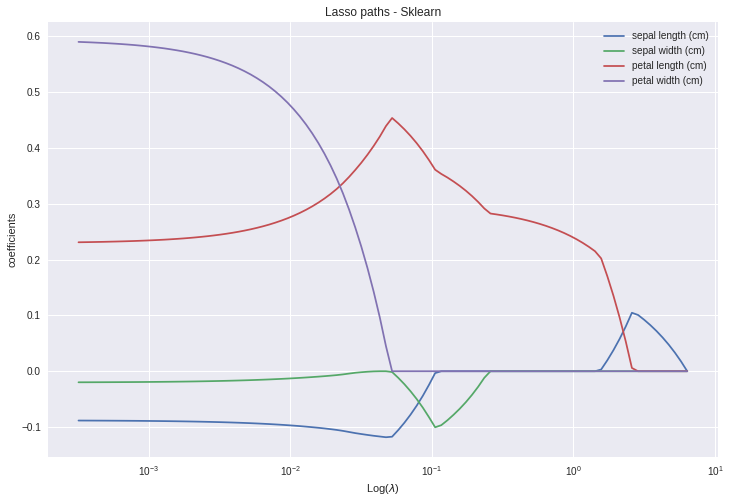

In [10]:
import sklearn

X / np.linalg.norm(X,axis=0)  # Standardize data (easier to set the l1_ratio parameter)
m,n = X.shape

eps = 5e-5  # the smaller it is the longer is the path

alphas_lasso, coefs_lasso, _ = sklearn.linear_model.lasso_path(X, Y, eps, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))
#neg_log_alphas_lasso = -np.log10(alphas_lasso)

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i], label = iris.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')